# Do you think it's a good idea? Why?

Yes, creating a model is a good idea because it will allow for quick processing and analysis of records, which will streamline the loan approval decision-making process, given that the credit team is being overloaded with a large volume of records. In addition, a machine learning model can identify patterns in data and improve over time, which can result in increased accuracy and efficiency, also reducing human bias in decision-making.

With this, the aim is to create a machine learning model that allows predicting whether a client is suitable or not to receive a loan. For this, historical loan data will be used and a model will be trained using different classification algorithms. Later, the model's performance will be evaluated using appropriate metrics and the best model for its implementation in the loan approval process will be selected.

# Problem Type
This is a supervised learning problem, as we are using labeled data (in this case, the 'Loan_status' column) to train our model. Our goal is to predict whether or not a loan will be granted to a client based on the provided characteristics.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import warnings
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
warnings.filterwarnings("ignore")

In [2]:
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError as e:
        print("File not found: Please make sure the file path is correct.")
        df = pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        df = pd.DataFrame()
    return df

df = load_data("datos_prestamo.csv")
df.head()

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina


In [3]:
# Remove unnecessary columns
df.drop(["Unnamed: 0", "Id"], axis=1, inplace=True)

# Check for missing values
print(df.isnull().sum())

Fecha_registro            0
Fecha_contacto            0
Genero                   12
Casado                    3
Dependientes             13
Educacion                 0
Trabaja_para_el          27
Salario                   0
Salario_Pareja            0
Credito_pedido           21
Plazo_prestamo           13
Historial_crediticio     47
Area_vivienda             0
Estatus_prestamo          0
Asesor_asignado         117
dtype: int64


This allows us to see if there are missing values and what type of data we have in each column. In this case, we find missing values in some columns, so we need to fill them in or remove them.

We can also perform basic descriptive statistics analysis to get an idea of the distribution of the data:

In [4]:
df.describe()

,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio
count,557.000000,557.000000,536.000000,544.000000,510.000000
mean,5478.807899,1685.644596,146.882463,342.220588,0.886275
std,6331.507982,2946.151879,86.435191,61.877404,0.317789
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2882.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1302.000000,127.500000,360.000000,1.000000
75%,5829.000000,2375.000000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This allows us to see the mean, standard deviation, minimum and maximum value, and quartiles of each numeric column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha_registro        557 non-null    object 
 1   Fecha_contacto        557 non-null    object 
 2   Genero                545 non-null    object 
 3   Casado                554 non-null    object 
 4   Dependientes          544 non-null    object 
 5   Educacion             557 non-null    object 
 6   Trabaja_para_el       530 non-null    object 
 7   Salario               557 non-null    int64  
 8   Salario_Pareja        557 non-null    float64
 9   Credito_pedido        536 non-null    float64
 10  Plazo_prestamo        544 non-null    float64
 11  Historial_crediticio  510 non-null    float64
 12  Area_vivienda         557 non-null    object 
 13  Estatus_prestamo      557 non-null    object 
 14  Asesor_asignado       440 non-null    object 
dtypes: float64(4), int64(1)

This allows us to see if there are missing values and what type of data we have in each column. In this case, we find missing values in some columns, so we need to fill them or remove them.



# Exploratory Data Analysis (EDA)

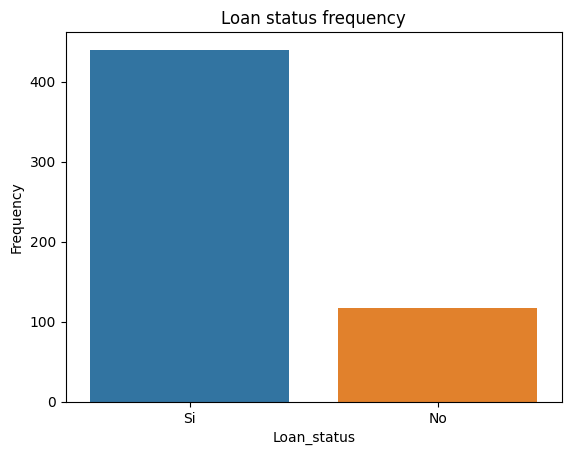

In [6]:
sns.countplot(x="Estatus_prestamo", data=df)
plt.xlabel("Loan_status")
plt.ylabel("Frequency")
plt.title("Loan status frequency")
plt.show()

With this visualization, we can see the distribution of the target variable in our data set. In this case, we are interested in predicting whether a loan was granted to the customer or not, so we are visualizing how many records we have for each category.



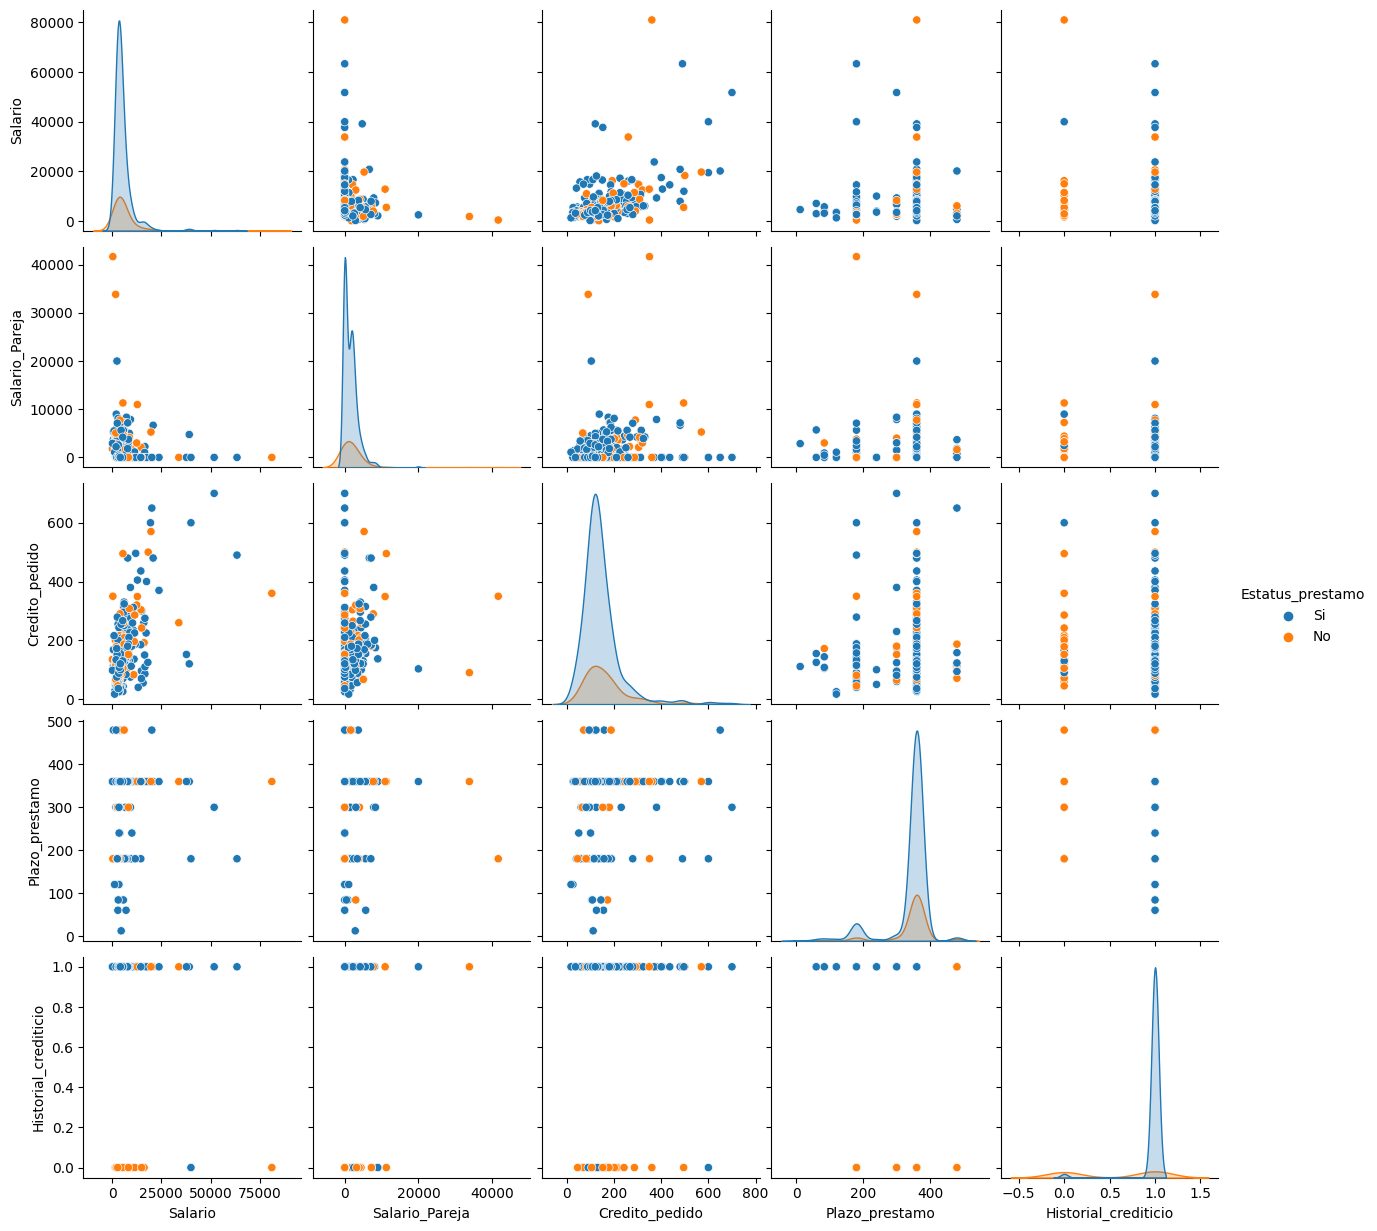

In [7]:
sns.pairplot(df, hue="Estatus_prestamo")
plt.show()

Text(0.5, 1.0, 'Requested Credit Distribution')

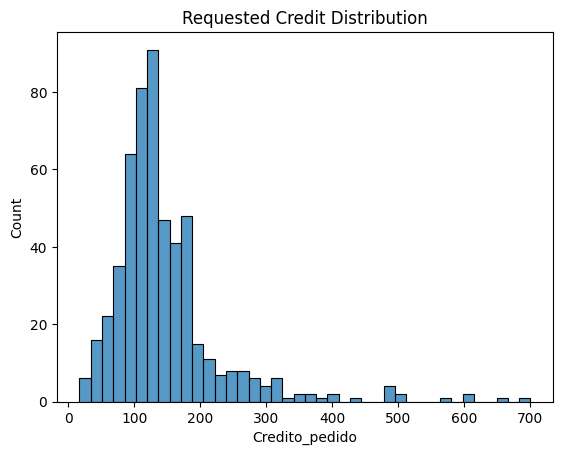

In [8]:
sns.histplot(df["Credito_pedido"], kde=False)
plt.title("Requested Credit Distribution")

This gives us an idea of how values are distributed in a column, in this case, the credit that was requested.

We can do the same for other columns, such as salary and loan term.

We can also create bar charts to visualize the distribution of categorical data, like gender and credit history:

Text(0.5, 1.0, 'Gender Distribution')

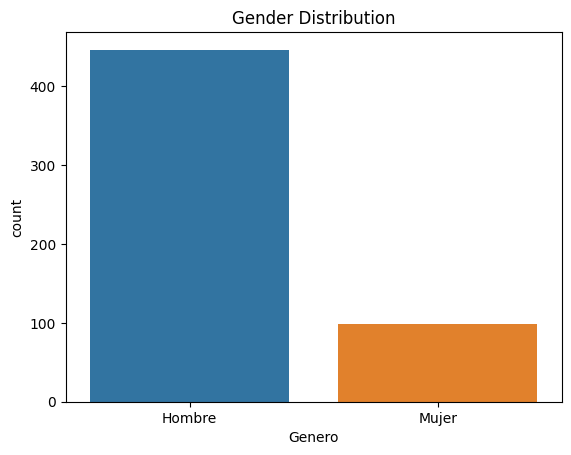

In [9]:
sns.countplot(x="Genero", data=df)
plt.title("Gender Distribution")

By doing an exploratory analysis we can have a better understanding of the data and prepare them to build a machine learning model.

# Data Preprocessing
Before training the model, we need to perform some data transformations. In this case, we have to fill in the missing values, encode the categorical variables, and scale the numerical variables.

To fill in the missing values, we can use the mean or mode of each column.

In [17]:
def fill_missing_values(df, column, strategy):
    """
    Function to fill missing values in a dataframe for a specified column
    using a defined strategy.

    :param df: input dataframe
    :param column: target column
    :param strategy: strategy to fill missing values, default is "mean"
    :return: dataframe with filled values
    """
    if strategy == "mean":
        df[column].fillna(df[column].mean(), inplace=True)
    elif strategy == "mode":
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        raise ValueError(f"Invalid strategy: {strategy}")

    return df

def convert_to_datetime(df, column):
    """
    Convert a column in the dataframe to datetime.

    :param df: input dataframe
    :param column: target column
    :return: dataframe with converted column
    """
    df[column] = pd.to_datetime(df[column])
    return df

def calculate_days(df, column1, column2):
    """
    Calculate days between two dates in dataframe.

    :param df: input dataframe
    :param column1: first date column
    :param column2: second date column
    :return: dataframe with added days column
    """
    df["Dias_de_contacto"] = (df[column1] - df[column2]).dt.days
    return df

def replace_values(df, column, mapping):
    """
    Replace values in a dataframe column based on a mapping.

    :param df: input dataframe
    :param column: target column
    :param mapping: a dict containing a mapping of old_value: new_value
    :return: dataframe with replaced values
    """
    df[column] = df[column].replace(mapping)
    return df

def drop_columns(df, columns):
    """
    Drop specified columns from dataframe.

    :param df: input dataframe
    :param columns: list of columns to be dropped
    :return: dataframe with dropped columns
    """
    df.drop(columns, axis=1, inplace=True)
    return df

# Apply the functions
df = fill_missing_values(df, "Asesor_asignado", "mode")
df = fill_missing_values(df, "Credito_pedido", "mean")
df = fill_missing_values(df, "Plazo_prestamo", "mean")
df = fill_missing_values(df, "Historial_crediticio", "mode")
df = fill_missing_values(df, "Trabaja_para_el", "mode")
df = fill_missing_values(df, "Genero", "mode")
df = fill_missing_values(df, "Casado", "mode")
df = fill_missing_values(df, "Dependientes", "mode")
df = replace_values(df, "Dependientes", {"3+": 10})
df = convert_to_datetime(df, "Fecha_registro")
df = convert_to_datetime(df, "Fecha_contacto")
df = calculate_days(df, "Fecha_contacto", "Fecha_registro")
df = drop_columns(df, ["Fecha_registro", "Fecha_contacto"])
df = replace_values(df, "Estatus_prestamo", {"Si": 1, "No": 0})

In [18]:
# Encode categorical variables
df = pd.get_dummies(
    df,
    columns=[
        "Genero",
        "Casado",
        "Educacion",
        "Trabaja_para_el",
        "Area_vivienda",
        "Asesor_asignado",
    ],
    drop_first=True,
)

# Model Building

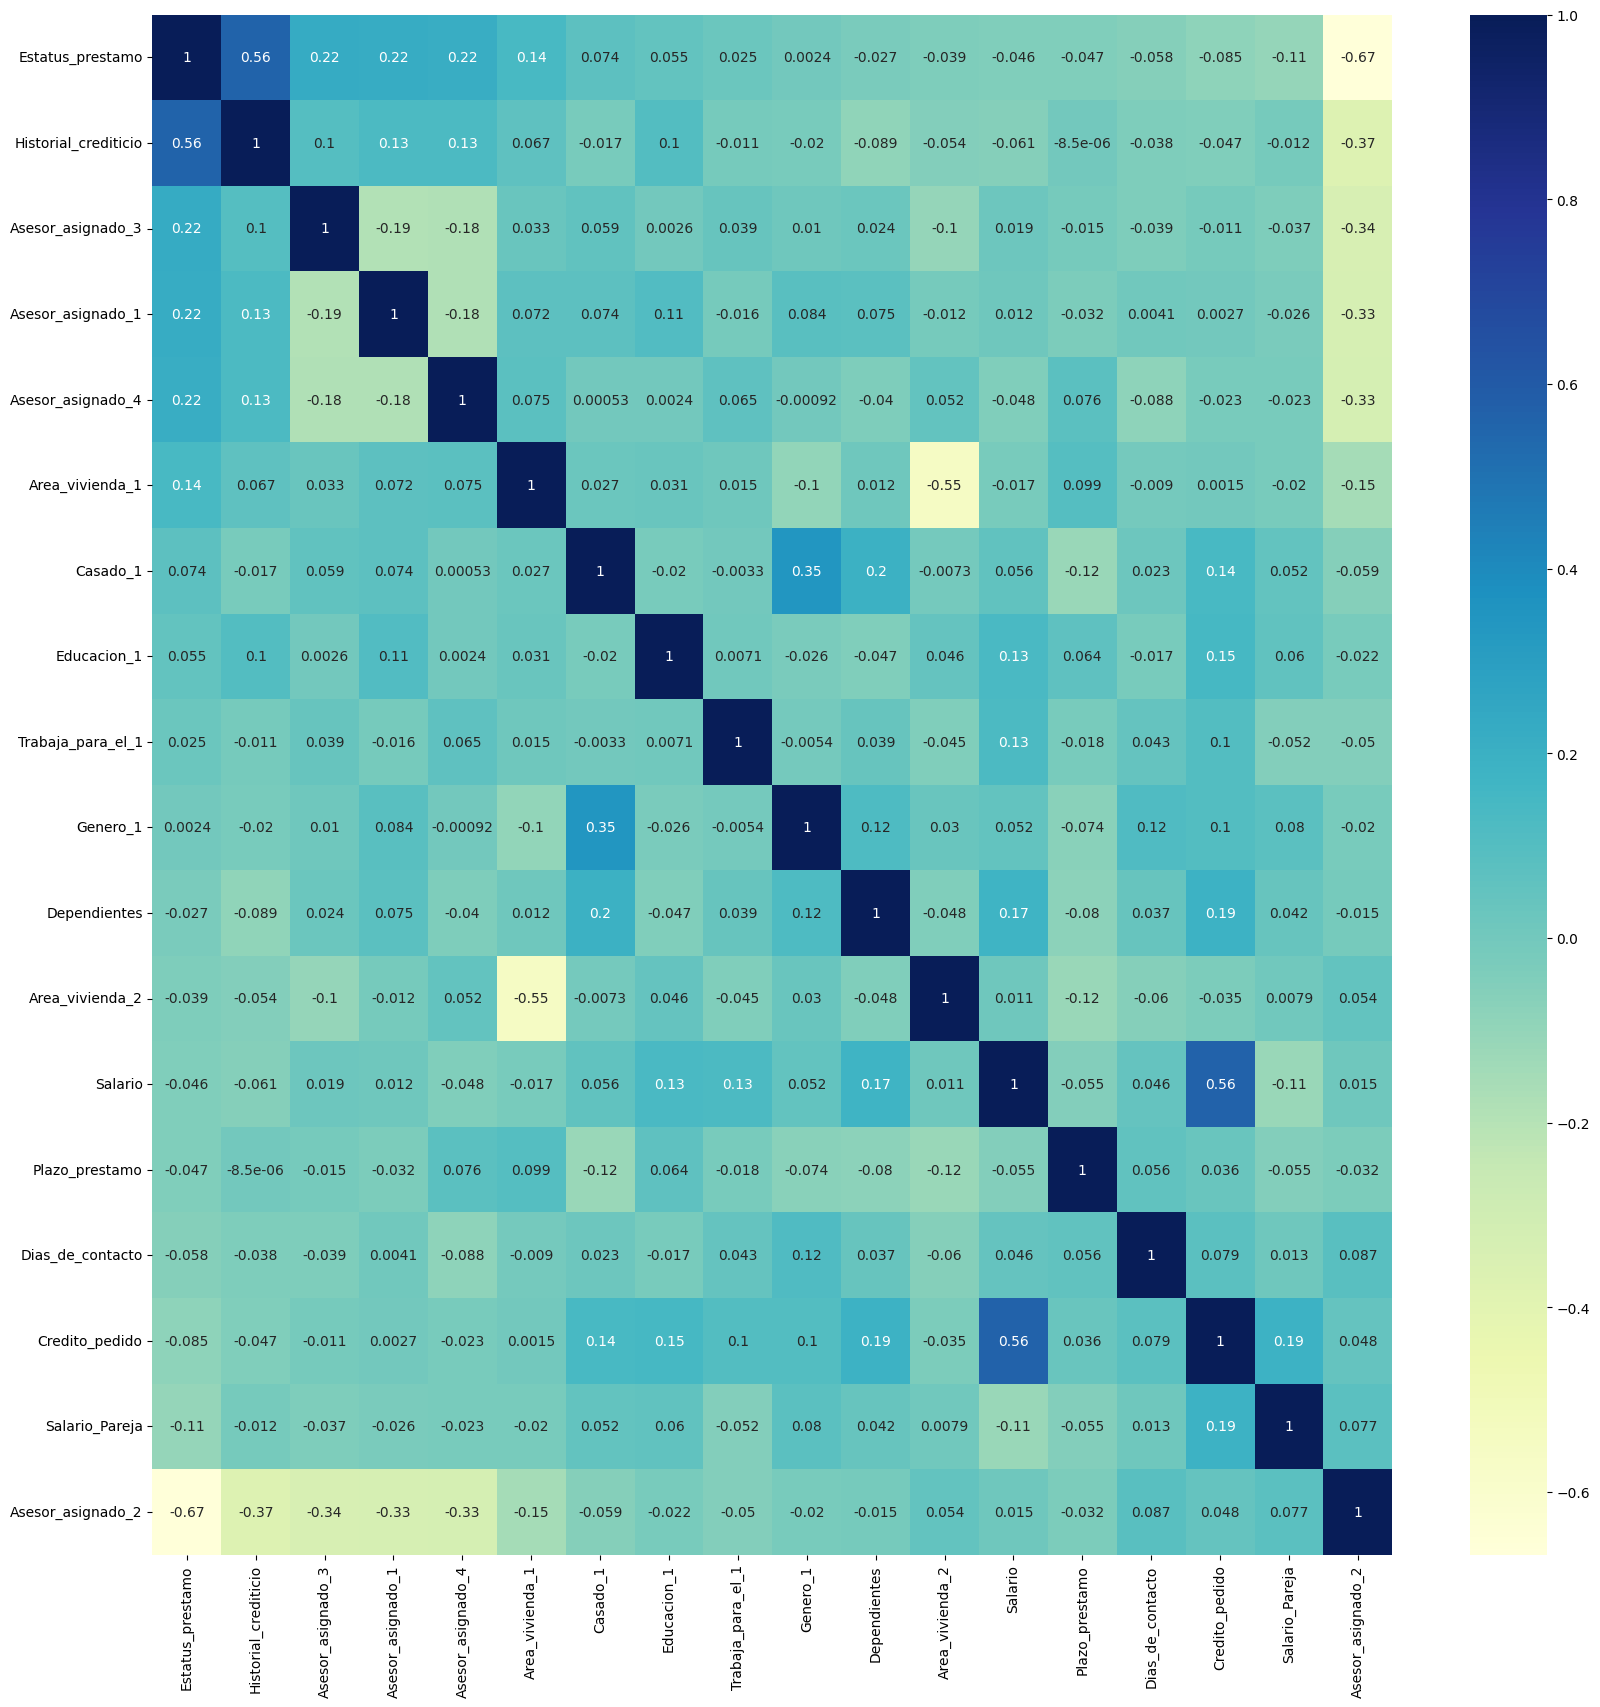

In [34]:
# Correlation analysis
corr = df.corr()

corr_organizado_Selling = corr['Estatus_prestamo'].sort_values(ascending=False)
cols = corr_organizado_Selling.index.tolist()

plt.figure(figsize=(20,20))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

# Model Building


In [19]:
# Split the data into training and test sets
X = df.drop("Estatus_prestamo", axis=1)
y = df["Estatus_prestamo"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Transform the test set using the scaler fitted on the training set

In [24]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from imblearn.over_sampling import SMOTE

# initialize SMOTE
smote = SMOTE(random_state=42)

# fit SMOTE on training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# checking the size of the data
print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

After OverSampling, counts of label '1': 357
After OverSampling, counts of label '0': 357


In [31]:
from tpot import TPOTClassifier

# Combine preprocessing and model into one pipeline
model = TPOTClassifier(generations=10, population_size=50, early_stop=5, verbosity=2)
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9369939919235695

Generation 2 - Current best internal CV score: 0.9369939919235695

Generation 3 - Current best internal CV score: 0.9411897961193736

Generation 4 - Current best internal CV score: 0.9411897961193736

Generation 5 - Current best internal CV score: 0.9467743524081552

Generation 6 - Current best internal CV score: 0.9467743524081552

Generation 7 - Current best internal CV score: 0.9481926524180044

Generation 8 - Current best internal CV score: 0.9495814045109819

Generation 9 - Current best internal CV score: 0.9495814045109819

Generation 10 - Current best internal CV score: 0.9495814045109819

Best pipeline: MLPClassifier(MLPClassifier(StandardScaler(input_matrix), alpha=0.0001, learning_rate_init=0.01), alpha=0.001, learning_rate_init=0.5)


TPOTClassifier(early_stop=5, generations=10, population_size=50, verbosity=2)

In [32]:
# Evaluate the combined model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.875
Precision: 0.9058823529411765
Recall: 0.927710843373494
F1-score: 0.9166666666666667


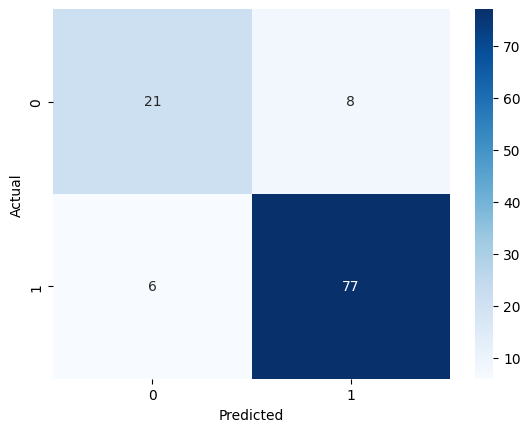

In [33]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Evaluation

In [35]:
# Save the model
joblib.dump(model.fitted_pipeline_, 'loan_prediction_model.pkl')

# To load the saved model and make predictions
# loaded_model = joblib.load('loan_prediction_model.pkl')

# You need to perform the transformations on X_new to use the model
# predictions = loaded_model.predict(X_new)

['loan_prediction_model.pkl']